<a href="https://colab.research.google.com/github/Mariam-Nazlawy/LeNet-Architecture-/blob/main/LeNet_with_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import required libraries**

In [43]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import tensorflow.keras.layers as tfl
import pandas as pd
from google.colab import drive
from sklearn.metrics import confusion_matrix

## **Load CIFAR Dataset**

In [2]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = load_data()

170498071/170498071 [==============================] - 6s 0us/step



## **Implementation of One hot encoding function**

In [3]:
def one_hot_encode(Y):
    nClasses = np.unique(Y).shape[0]
    coded = np.zeros((len(Y), nClasses)).astype(np.float32)
    coded[np.arange(len(Y)), Y] = 1.0
    return coded

## **Normalizing and check the dimensions of each array**

In [4]:
# Normalize image vectors
x_train = x_train_orig/255.
x_test = x_test_orig/255.

y_train = one_hot_encode(y_train_orig)
y_test = one_hot_encode(y_test_orig)

print("Number of training examples = " + str(x_train.shape[0]))
print("Number of testing examples = " + str(x_test.shape[0]))
print("x_train shape: " + str(x_train.shape))
print("y_train shape: " + str(y_train.shape))
print("x_test shape: " + str(x_test.shape))
print("y_test shape: " + str(y_test.shape))

Number of training examples = 50000
Number of testing examples = 10000
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


## **Print unique classes**

In [5]:
unique_labels = np.unique(y_train)

## **Visualize the first 15 examples**

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


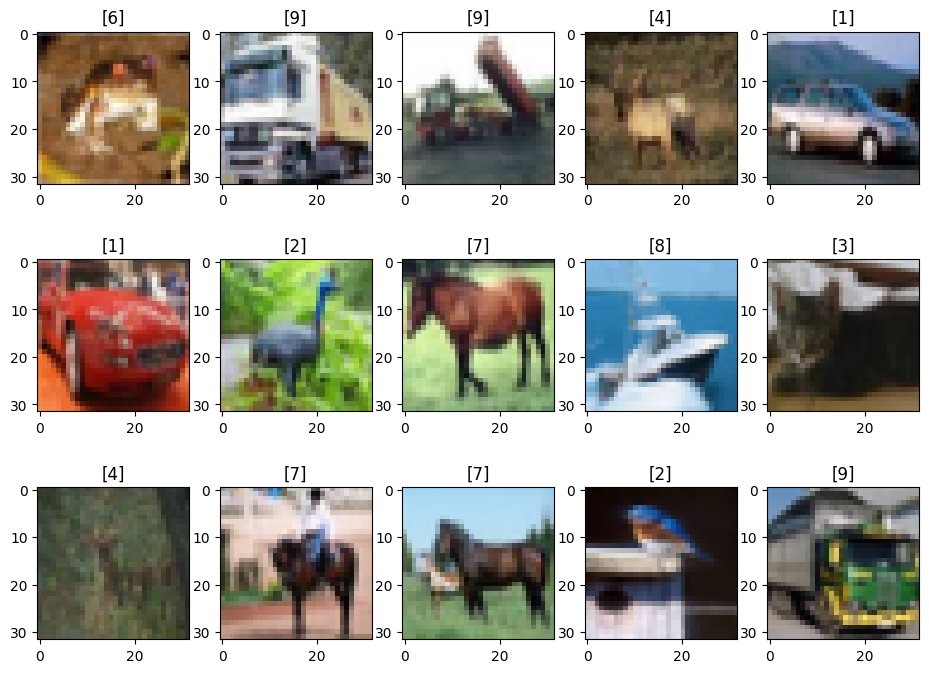

In [6]:
n_row=5
n_col=5

plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)

for i in range(15):
  plt.subplot(n_row, n_col, i + 1)
  plt.imshow(x_train[i])
  plt.title(y_train_orig[i])
  plt.show

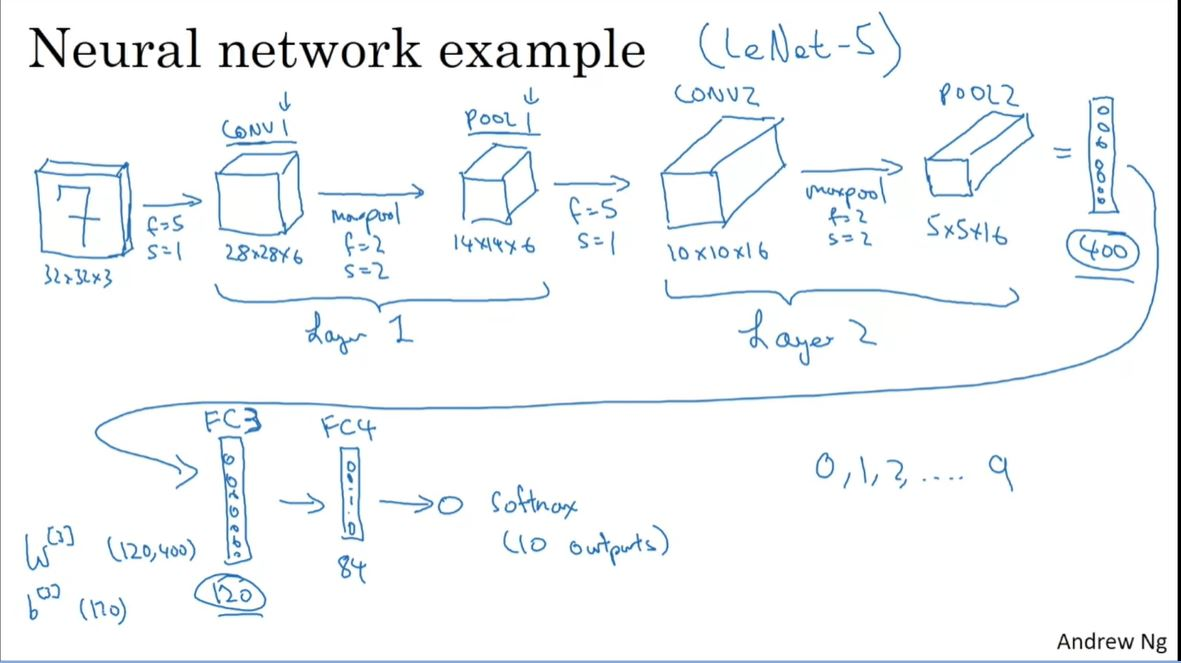

## **LeNet Architecture using Functional Model**

In [13]:
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)

    ## CONV2D: 6 filters 5x5, stride of 1, padding 'SAME'
    Z1 = tfl.Conv2D(filters=6, kernel_size=(5, 5), strides=1, padding='valid')(input_img)

    ## RELU
    A1 = tfl.ReLU()(Z1)

    ## AveragePOOL: window 2x2, stride 2, padding 'SAME'
    P1 = tfl.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')(A1)

    ## CONV2D: 16 filters 5x5, stride 1, padding 'SAME'
    Z2 = tfl.Conv2D(filters=16, kernel_size=(5, 5), strides=1, padding='valid')(P1)

    ## RELU
    A2 = tfl.ReLU()(Z2)

    ## AveragePOOL: window 2x2, stride 2, padding 'SAME'
    P2 = tfl.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')(A2)

    ## FLATTEN
    F = tfl.Flatten()(P2)

    ## Dense layers
    FC3 = tfl.Dense(120, activation='relu')(F)

    FC4 = tfl.Dense(84, activation='relu')(FC3)

    ## 10 neurons in output layer. One of the arguments should be "activation='softmax'"
    outputs = tfl.Dense(10, activation='softmax')(FC4)


    model = tf.keras.Model(inputs=input_img, outputs=outputs)

    return model

## **Comile the model**

In [14]:
conv_model = convolutional_model((32, 32, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', 'Precision', 'Recall', tf.keras.metrics.F1Score()])
conv_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 re_lu_2 (ReLU)              (None, 28, 28, 6)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 re_lu_3 (ReLU)              (None, 10, 10, 16)        0         
                                                           

## **Train the Model**

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(2000)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(1000)
history = conv_model.fit(train_dataset, epochs=50, validation_data=test_dataset)

Epoch 1/50
25/25 [==============================] - 3s 70ms/step - loss: 65.2903 - accuracy: 0.1820 - precision: 1.0000 - recall: 0.0389 - f1_score: 0.1231 - val_loss: 319.6366 - val_accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 0.1000 - val_f1_score: 0.1000
Epoch 2/50
25/25 [==============================] - 1s 53ms/step - loss: 3549.3440 - accuracy: 0.2688 - precision: 1.0000 - recall: 0.0990 - f1_score: 0.1454 - val_loss: 12409.5430 - val_accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 0.0985 - val_f1_score: 0.1341
Epoch 3/50
25/25 [==============================] - 1s 48ms/step - loss: 47526.5859 - accuracy: 0.0659 - precision: 1.0000 - recall: 0.0999 - f1_score: 0.1513 - val_loss: 113581.3516 - val_accuracy: 0.0211 - val_precision: 1.0000 - val_recall: 0.0998 - val_f1_score: 0.1157
Epoch 4/50
25/25 [==============================] - 1s 48ms/step - loss: 259923.6406 - accuracy: 0.1489 - precision: 1.0000 - recall: 0.1000 - f1_score: 0.1579 - val_loss: 486204

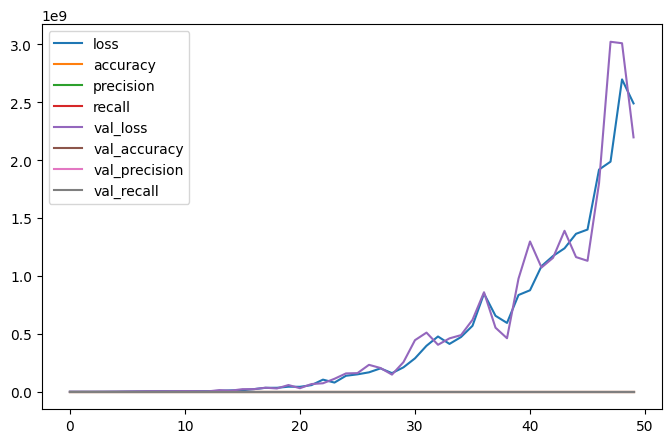

In [16]:
pd.DataFrame(conv_model.history.history).plot(figsize=(8,5))
plt.show()

## **LeNet Architecture using Sequenial Model**

In [18]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', name='conv1'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, name='pool1'),
        tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu', name='conv2'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, name='pool2'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu', name='fc1'),
        tf.keras.layers.Dense(84, activation='relu', name='fc2'),
        tf.keras.layers.Dense(10, activation='softmax', name='fc3'),
    ]
)

## **Compile the Model**

In [19]:
model.build(x_train.shape)
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', 'Precision', 'Recall', tf.keras.metrics.F1Score()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (50000, 28, 28, 6)        456       
                                                                 
 pool1 (MaxPooling2D)        (50000, 14, 14, 6)        0         
                                                                 
 conv2 (Conv2D)              (50000, 10, 10, 16)       2416      
                                                                 
 pool2 (MaxPooling2D)        (50000, 5, 5, 16)         0         
                                                                 
 flatten_2 (Flatten)         (50000, 400)              0         
                                                                 
 fc1 (Dense)                 (50000, 120)              48120     
                                                                 
 fc2 (Dense)                 (50000, 84)               1

## **Train the Model**

In [20]:
model.fit(x_train, y_train, epochs=40, validation_split=0.1)

Epoch 1/40
1407/1407 [==============================] - 12s 7ms/step - loss: 467634784.0000 - accuracy: 0.0945 - precision: 1.0000 - recall: 0.0990 - f1_score: 0.1816 - val_loss: 2180216576.0000 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 0.1000 - val_f1_score: 0.1000
Epoch 2/40
1407/1407 [==============================] - 8s 6ms/step - loss: 10589159424.0000 - accuracy: 0.1006 - precision: 1.0000 - recall: 0.0998 - f1_score: 0.1822 - val_loss: 21034059776.0000 - val_accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 0.1000 - val_f1_score: 0.1000
Epoch 3/40
1407/1407 [==============================] - 9s 7ms/step - loss: 42455650304.0000 - accuracy: 0.1014 - precision: 1.0000 - recall: 0.0997 - f1_score: 0.1823 - val_loss: 67954843648.0000 - val_accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 0.1000 - val_f1_score: 0.1000
Epoch 4/40
1407/1407 [==============================] - 11s 8ms/step - loss: 118203441152.0000 - accuracy: 0.0995 - precision: 1.0

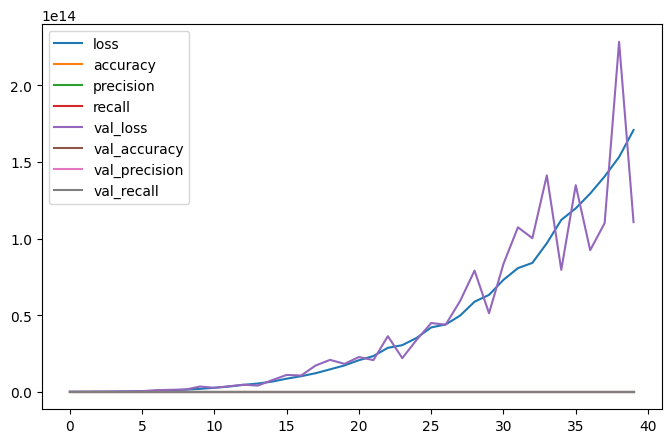

In [21]:
pd.DataFrame(model.history.history).plot(figsize=(8,5))
plt.show()